<a href="https://colab.research.google.com/github/Pedro-Henrique3216/CP4-IA/blob/main/CP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose

1. Carregue o dataset e exiba as 10 primeiras linhas

In [45]:
dados = pd.read_csv('/content/household_power_consumption.txt', sep=";", low_memory=False, na_values="?")
dados.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.86,15.8,0.0,2.0,16.0


2. Explique a diferença entre as variáveis Global_active_power e Global_reactive_power

In [3]:
#Global_active_power: potência ativa (kW) realmente consumida.
#Global_reactive_power: potência reativa (kW), circula entre fonte e carga, não realiza trabalho útil.

3.  Verifique se existem valores ausentes no dataset. Quantifique-os

In [50]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


In [52]:
dados.isnull().sum()

,0
Date,0
Time,0
Global_active_power,25979
Global_reactive_power,25979
Voltage,25979
Global_intensity,25979
Sub_metering_1,25979
Sub_metering_2,25979
Sub_metering_3,25979


4. Converta a coluna Date para o tipo datetime e crie uma nova coluna com o dia da semana
correspondente.

In [6]:
dados["Date"] = pd.to_datetime(dados["Date"], format="%d/%m/%Y")
dados["Dia_Semana"] = dados["Date"].dt.dayofweek

In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 10 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Time                   object        
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
 9   Dia_Semana             int32         
dtypes: datetime64[ns](1), float64(7), int32(1), object(1)
memory usage: 150.4+ MB


In [8]:
dados.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Dia_Semana
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,5
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,5
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,5
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,5
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,5
5,2006-12-16,17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0,5
6,2006-12-16,17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0,5
7,2006-12-16,17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0,5
8,2006-12-16,17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0,5
9,2006-12-16,17:33:00,3.662,0.510,233.86,15.8,0.0,2.0,16.0,5


5. Filtre os registros apenas do ano de 2007 e calcule a média de consumo diário de
Global_active_power.

In [9]:
dados["Global_active_power"] = pd.to_numeric(dados["Global_active_power"], errors="coerce")
df_2007 = dados[dados["Date"].dt.year == 2007]

In [10]:
media_diaria_2007 = df_2007.groupby("Date")["Global_active_power"].mean()
print("\nMédia diária de Global_active_power em 2007:")
print(media_diaria_2007)


Média diária de Global_active_power em 2007:
Date
2007-01-01    1.909031
2007-01-02    0.881414
2007-01-03    0.704204
2007-01-04    2.263481
2007-01-05    1.884281
                ...   
2007-12-27    1.758471
2007-12-28    2.161842
2007-12-29    2.290942
2007-12-30    1.777025
2007-12-31    1.539265
Name: Global_active_power, Length: 365, dtype: float64


In [11]:

media_global_active_power = df_2007['Global_active_power'].mean()
print(f"A média de consumo de Global_active_power no ano de 2007 é: {media_global_active_power}")

A média de consumo de Global_active_power no ano de 2007 é: 1.117007500924916


In [12]:
df_2007.info()

<class 'pandas.core.frame.DataFrame'>
Index: 525600 entries, 21996 to 547595
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Date                   525600 non-null  datetime64[ns]
 1   Time                   525600 non-null  object        
 2   Global_active_power    521669 non-null  float64       
 3   Global_reactive_power  521669 non-null  float64       
 4   Voltage                521669 non-null  float64       
 5   Global_intensity       521669 non-null  float64       
 6   Sub_metering_1         521669 non-null  float64       
 7   Sub_metering_2         521669 non-null  float64       
 8   Sub_metering_3         521669 non-null  float64       
 9   Dia_Semana             525600 non-null  int32         
dtypes: datetime64[ns](1), float64(7), int32(1), object(1)
memory usage: 42.1+ MB


6. Gere um gráfico de linha mostrando a variação de Global_active_power em um único dia à sua
escolha.

/tmp/ipython-input-2663752542.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  um_dia["Datetime"] = pd.to_datetime(um_dia["Date"].astype(str) + " " + um_dia["Time"])


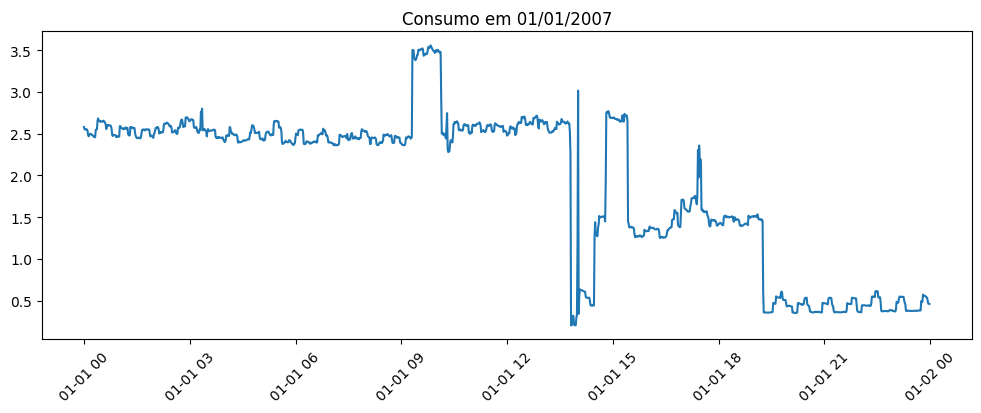

In [13]:
um_dia = dados[dados["Date"] == "2007-01-01"]
um_dia["Datetime"] = pd.to_datetime(um_dia["Date"].astype(str) + " " + um_dia["Time"])
plt.figure(figsize=(12,4))
plt.plot(um_dia["Datetime"], um_dia["Global_active_power"])
plt.title("Consumo em 01/01/2007")
plt.xticks(rotation=45)
plt.show()

In [14]:
um_dia.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Dia_Semana,Datetime
21996,2007-01-01,00:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0,0,2007-01-01 00:00:00
21997,2007-01-01,00:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0,0,2007-01-01 00:01:00
21998,2007-01-01,00:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0,0,2007-01-01 00:02:00
21999,2007-01-01,00:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0,0,2007-01-01 00:03:00
22000,2007-01-01,00:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0,0,2007-01-01 00:04:00


7. Crie um histograma da variável Voltage. O que pode ser observado sobre sua distribuição?

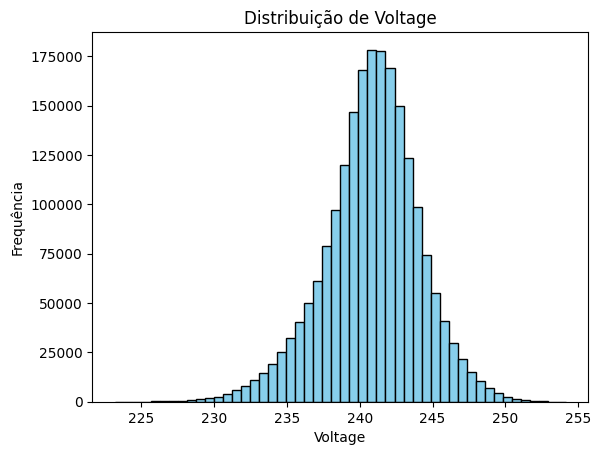

In [15]:
dados["Voltage"] = pd.to_numeric(dados["Voltage"], errors="coerce")
plt.hist(dados["Voltage"].dropna(), bins=50, color="skyblue", edgecolor="black")
plt.title("Distribuição de Voltage")
plt.xlabel("Voltage")
plt.ylabel("Frequência")
plt.show()

#A distribuição de voltage monitorada se mantém bem estável, com tensões girando em torno de 240V e poucas variações extremas.

8. Calcule o consumo médio por mês em todo o período disponível no dataset.

In [16]:
dados["AnoMes"] = dados["Date"].dt.to_period("M")
media_mensal = dados.groupby("AnoMes")["Global_active_power"].mean()
print("\nConsumo médio mensal:")
media_mensal


Consumo médio mensal:


,Global_active_power
AnoMes,
2006-12,1.901295
2007-01,1.546034
2007-02,1.401084
2007-03,1.318627
2007-04,0.891189
2007-05,0.985862
2007-06,0.826814
2007-07,0.667367
2007-08,0.764186


9. Identifique o dia com maior consumo de energia ativa global (Global_active_power).

In [17]:
consumo_por_dia = dados.groupby("Date")["Global_active_power"].sum()
dia_max = consumo_por_dia.idxmax()
print(f"\nDia com maior consumo: {dia_max} ({consumo_por_dia.max()} kW)")


Dia com maior consumo: 2006-12-23 00:00:00 (4773.386 kW)


10. Compare o consumo médio de energia ativa global em dias de semana versus finais de
semana.

In [18]:
dados["is_weekend"] = dados["Date"].dt.weekday > 5
print("\nConsumo médio semana vs fim de semana:")
print(dados.groupby("is_weekend")["Global_active_power"].mean())


Consumo médio semana vs fim de semana:
is_weekend
False    1.070419
True     1.220188
Name: Global_active_power, dtype: float64


11. Calcule a correlação entre as variáveis Global_active_power, Global_reactive_power, Voltage
e Global_intensity.

In [19]:
dados["Global_active_power"] = pd.to_numeric(dados["Global_active_power"], errors="coerce")
dados["Global_reactive_power"] = pd.to_numeric(dados["Global_reactive_power"], errors="coerce")
cols_corr = ["Global_active_power","Global_reactive_power","Voltage","Global_intensity"]
print("\nCorrelação entre variáveis:")
print(dados[cols_corr].corr())


Correlação entre variáveis:
                       Global_active_power  Global_reactive_power   Voltage  \
Global_active_power               1.000000               0.247017 -0.399762   
Global_reactive_power             0.247017               1.000000 -0.112246   
Voltage                          -0.399762              -0.112246  1.000000   
Global_intensity                  0.998889               0.266120 -0.411363   

                       Global_intensity  
Global_active_power            0.998889  
Global_reactive_power          0.266120  
Voltage                       -0.411363  
Global_intensity               1.000000  


12. Crie uma nova variável chamada Total_Sub_metering que some Sub_metering_1,
Sub_metering_2 e Sub_metering_3.

In [20]:
dados["Total_Sub_metering"] = dados["Sub_metering_1"] + dados["Sub_metering_2"] + dados["Sub_metering_3"]
dados.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Dia_Semana,AnoMes,is_weekend,Total_Sub_metering
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,5,2006-12,False,18.0
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,5,2006-12,False,17.0
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,5,2006-12,False,19.0
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,5,2006-12,False,18.0
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,5,2006-12,False,18.0


13. Verifique se há algum mês em que Total_Sub_metering ultrapassa a média de
Global_active_power.

In [21]:
media_global_active_power = dados["Global_active_power"].mean()
mensal_sub = dados.groupby("AnoMes")["Total_Sub_metering"].mean()
comparacao = mensal_sub > media_global_active_power
print(f"\nMédia de Global_active_power: {media_global_active_power}")
print("\nMeses em que Total_Sub_metering > Global_active_power médio:")
comparacao[comparacao].index


Média de Global_active_power: 1.0916150365006245

Meses em que Total_Sub_metering > Global_active_power médio:


PeriodIndex(['2006-12', '2007-01', '2007-02', '2007-03', '2007-04', '2007-05',
             '2007-06', '2007-07', '2007-08', '2007-09', '2007-10', '2007-11',
             '2007-12', '2008-01', '2008-02', '2008-03', '2008-04', '2008-05',
             '2008-06', '2008-07', '2008-08', '2008-09', '2008-10', '2008-11',
             '2008-12', '2009-01', '2009-02', '2009-03', '2009-04', '2009-05',
             '2009-06', '2009-07', '2009-08', '2009-09', '2009-10', '2009-11',
             '2009-12', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05',
             '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11'],
            dtype='period[M]', name='AnoMes')

14. Faça um gráfico de série temporal do Voltage para o ano de 2008

/tmp/ipython-input-4075353358.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2008["Datetime"] = pd.to_datetime(df_2008["Date"].astype(str) + " " + df_2008["Time"])


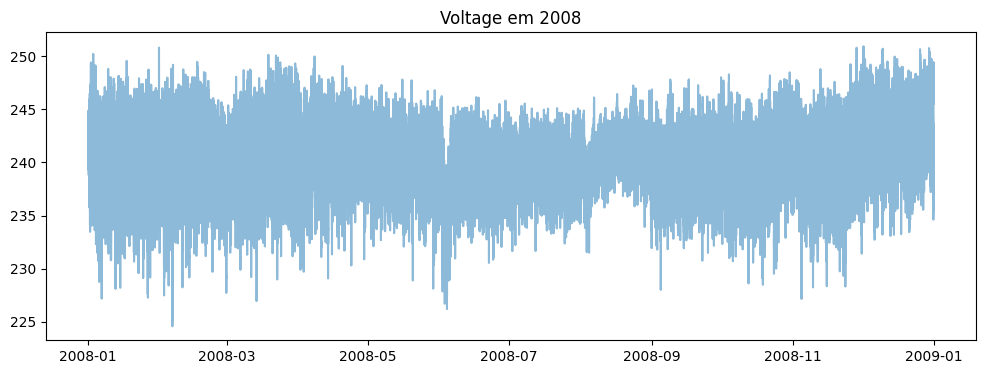

In [22]:
df_2008 = dados[dados["Date"].dt.year == 2008]
df_2008["Datetime"] = pd.to_datetime(df_2008["Date"].astype(str) + " " + df_2008["Time"])
plt.figure(figsize=(12,4))
plt.plot(df_2008["Datetime"], df_2008["Voltage"], alpha=0.5)
plt.title("Voltage em 2008")
plt.show()

15. Compare o consumo entre os meses de verão e inverno (no hemisfério norte)

In [23]:
dados["Mes"] = dados["Date"].dt.month
verao = dados[dados["Mes"].isin([6,7,8])]["Global_active_power"].mean()
inverno = dados[dados["Mes"].isin([12,1,2])]["Global_active_power"].mean()
print(f"\nConsumo médio Verão: {verao:.2f}, Inverno: {inverno:.2f}")


Consumo médio Verão: 0.73, Inverno: 1.42


16. Aplique uma amostragem aleatória de 1% dos dados e verifique se a distribuição de
Global_active_power é semelhante à da base completa.

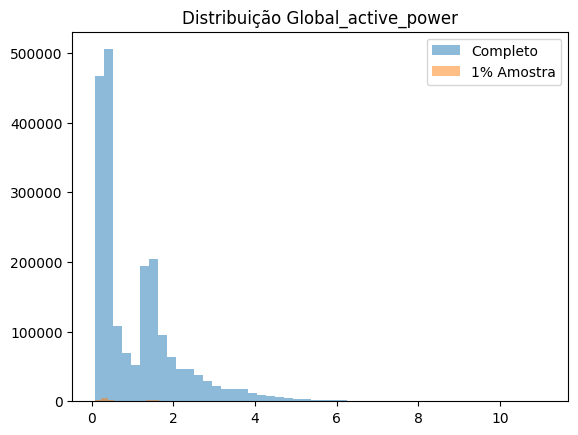

In [24]:
sample = dados.sample(frac=0.01, random_state=42)
plt.hist(dados["Global_active_power"].dropna(), bins=50, alpha=0.5, label="Completo")
plt.hist(sample["Global_active_power"].dropna(), bins=50, alpha=0.5, label="1% Amostra")
plt.legend()
plt.title("Distribuição Global_active_power")
plt.show()

17. Utilize uma técnica de normalização (Min-Max Scaling) para padronizar as variáveis numéricas
principais

In [25]:
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(dados[cols_corr].dropna()), columns=cols_corr)
print("\nDados normalizados (primeiras linhas):")
df_scaled.head()


Dados normalizados (primeiras linhas):


,Global_active_power,Global_reactive_power,Voltage,Global_intensity
0,0.374796,0.300719,0.376090,0.377593
1,0.478363,0.313669,0.336995,0.473029
2,0.479631,0.358273,0.326010,0.473029
3,0.480898,0.361151,0.340549,0.473029
4,0.325005,0.379856,0.403231,0.323651


18. Aplique K-means para segmentar os dias em 3 grupos distintos de consumo elétrico. Interprete
os resultados

In [26]:
df_day = dados.groupby("Date")[["Global_active_power"]].mean().dropna()
kmeans = KMeans(n_clusters=3, random_state=42).fit(df_day)
df_day["Cluster"] = kmeans.labels_
print("\nAgrupamento de dias em 3 clusters:")
df_day.head(10)


Agrupamento de dias em 3 clusters:


,Global_active_power,Cluster
Date,,
2006-12-16,3.053475,2
2006-12-17,2.354486,2
2006-12-18,1.530435,1
2006-12-19,1.157079,1
2006-12-20,1.545658,2
2006-12-21,1.193758,1
2006-12-22,1.625929,2
2006-12-23,3.314851,2
2006-12-24,1.770842,2


19. Realize uma decomposição de série temporal (tendência, sazonalidade e resíduo) para
Global_active_power em um período de 6 meses

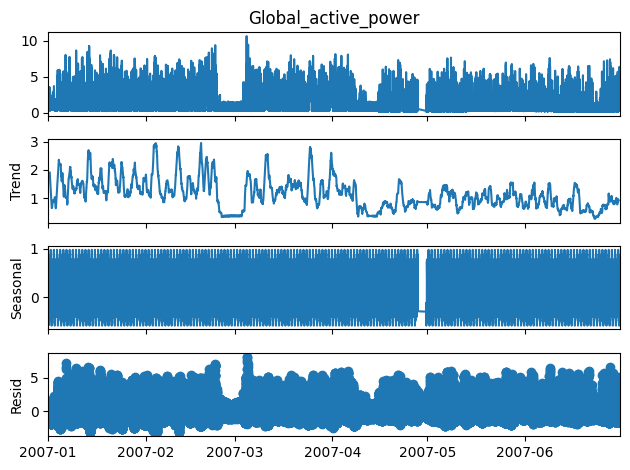

In [27]:
df_ts = dados.set_index(pd.to_datetime(dados["Date"].astype(str) + " " + dados["Time"]))
df_ts = df_ts["Global_active_power"].dropna()
df_6m = df_ts["2007-01":"2007-06"]

decomp = seasonal_decompose(df_6m, model="additive", period=1440) # 1440 minutos em 1 dia
decomp.plot()
plt.show()

20. Treine um modelo de regressão linear simples para prever Global_active_power a partir de
Global_intensity. Avalie o erro do modelo.

In [28]:
df_reg = dados.dropna(subset=["Global_active_power","Global_intensity"])
X = df_reg[["Global_intensity"]]
y = df_reg["Global_active_power"]

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"\nRMSE da regressão linear simples: {rmse:.4f}")


RMSE da regressão linear simples: 0.0498


In [29]:
from pandas.plotting import autocorrelation_plot
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

21. Séries temporais por hora
- Converta Date e Time em índice datetime.
- Reamostre os dados em intervalos de 1 hora, calculando a média de Global_active_power.
- Identifique os horários de maior consumo médio ao longo do dia.
Observação: uma série temporal é um conjunto de dados registrados em ordem cronológica, útil
para identificar padrões de comportamento ao longo do tempo.


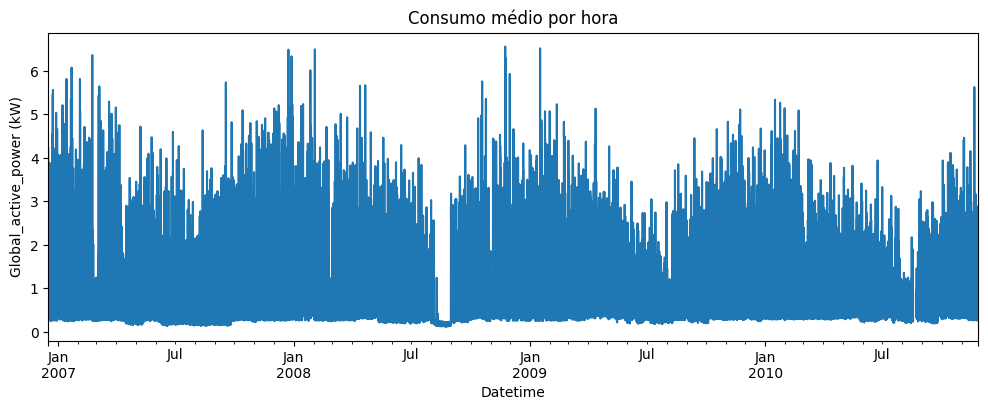


Consumo médio por horário do dia:
Datetime
20    1.899064
21    1.877697
19    1.733335
7     1.502246
8     1.461016
Name: Global_active_power, dtype: float64


In [30]:
dados["Datetime"] = pd.to_datetime(dados["Date"].astype(str) + " " + dados["Time"])
dados.set_index("Datetime", inplace=True)

# Reamostrar em 1h
hora = dados["Global_active_power"].resample("1h").mean()

plt.figure(figsize=(12,4))
hora.plot()
plt.title("Consumo médio por hora")
plt.ylabel("Global_active_power (kW)")
plt.show()

# Identificar horários de maior consumo médio (ao longo do dia)
hora_por_horario = dados.groupby(dados.index.hour)["Global_active_power"].mean()
print("\nConsumo médio por horário do dia:")
print(hora_por_horario.sort_values(ascending=False).head())

22. Autocorrelação do consumo
- Use a série temporal de Global_active_power.
- Calcule a autocorrelação em lags de 1h, 24h e 48h.
- Pergunta: existem padrões repetidos diariamente?

Autocorrelação com lag 1h: 0.7135
Autocorrelação com lag 24h: 0.4359
Autocorrelação com lag 48h: 0.4013


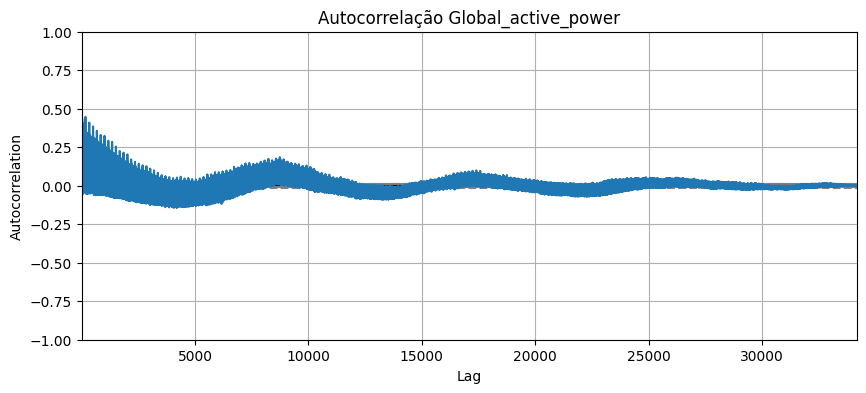

In [31]:
lags = [1, 24, 48] # em horas
for lag in lags:
    corr = hora.autocorr(lag=lag)
    print(f"Autocorrelação com lag {lag}h: {corr:.4f}")

plt.figure(figsize=(10,4))
autocorrelation_plot(hora.dropna())
plt.title("Autocorrelação Global_active_power")
plt.show()

23. Redução de dimensionalidade com PCA
- Selecione Global_active_power, Global_reactive_power, Voltage e Global_intensity.
- Aplique PCA para reduzir para 2 componentes principais.
- Analise a variância explicada por cada componente

In [32]:
features = ["Global_active_power","Global_reactive_power","Voltage","Global_intensity"]
df_pca = dados[features].dropna()

pca = PCA(n_components=2)
components = pca.fit_transform(df_pca)

print("\nVariância explicada pelos 2 componentes principais:")
print(pca.explained_variance_ratio_)


Variância explicada pelos 2 componentes principais:
[0.75442158 0.24513217]


24. Visualização de clusters no espaço PCA
- Combine os resultados do PCA com K-Means (3 clusters).
- Plote os pontos resultantes e pinte cada grupo por cluster.
- Pergunta: os grupos se separam de forma clara?

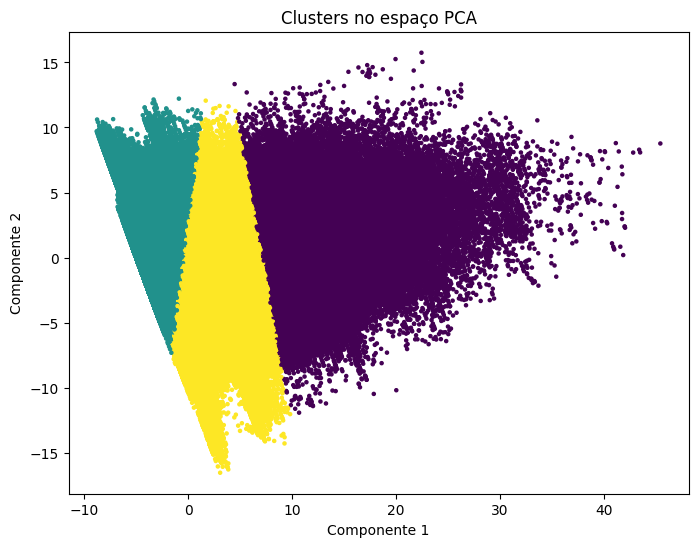

In [33]:
kmeans_pca = KMeans(n_clusters=3, random_state=42).fit(components)
clusters = kmeans_pca.labels_

plt.figure(figsize=(8,6))
plt.scatter(components[:,0], components[:,1], c=clusters, cmap="viridis", s=5)
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.title("Clusters no espaço PCA")
plt.show()

25. Regressão polinomial vs linear
- Modele Global_active_power em função de Voltage.
- Compare Regressão Linear Simples com Regressão Polinomial (grau 2).
- Analise RMSE e a curva ajustada.


RMSE Linear: 0.9691
RMSE Polinomial grau 2: 0.9648


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


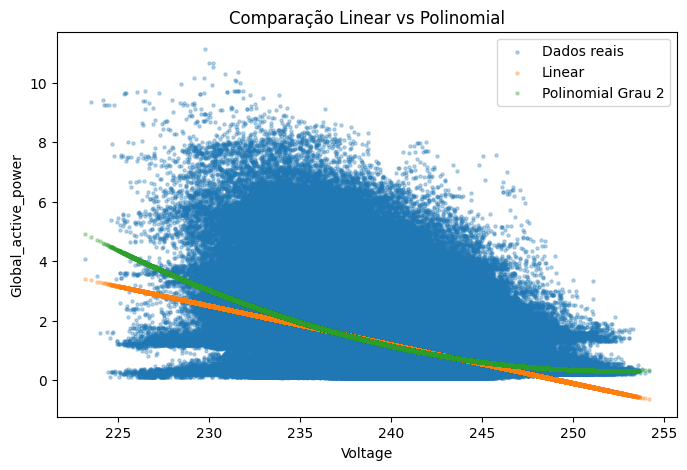

In [34]:
df_reg2 = dados.dropna(subset=["Global_active_power","Voltage"])
X = df_reg2[["Voltage"]]
y = df_reg2["Global_active_power"]

# Linear
lin_model = LinearRegression()
lin_model.fit(X, y)
y_lin = lin_model.predict(X)
rmse_lin = np.sqrt(mean_squared_error(y, y_lin))

# Polinomial grau 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
y_poly = poly_model.predict(X_poly)
rmse_poly = np.sqrt(mean_squared_error(y, y_poly))

print(f"\nRMSE Linear: {rmse_lin:.4f}")
print(f"RMSE Polinomial grau 2: {rmse_poly:.4f}")

# Plot comparando
plt.figure(figsize=(8,5))
plt.scatter(X, y, alpha=0.3, s=5, label="Dados reais")
plt.scatter(X, y_lin, alpha=0.3, s=5, label="Linear")
plt.scatter(X, y_poly, alpha=0.3, s=5, label="Polinomial Grau 2")
plt.legend()
plt.xlabel("Voltage")
plt.ylabel("Global_active_power")
plt.title("Comparação Linear vs Polinomial")
plt.show()

26. Carregamento e inspeção inicial
- Carregue o dataset no Pandas.
- Liste tipos de dados e estatísticas descritivas (.info() e .describe())

In [35]:
df_app = pd.read_csv("energydata_complete.csv")

print("\nInfo dataset Appliances:")
print(df_app.info())
print("\nEstatísticas descritivas:")
print(df_app.describe())



Info dataset Appliances:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 n

27. Distribuição do consumo
- Crie histogramas e séries temporais para a variável Appliances.
- Pergunta: o consumo tende a se concentrar em valores baixos ou altos?

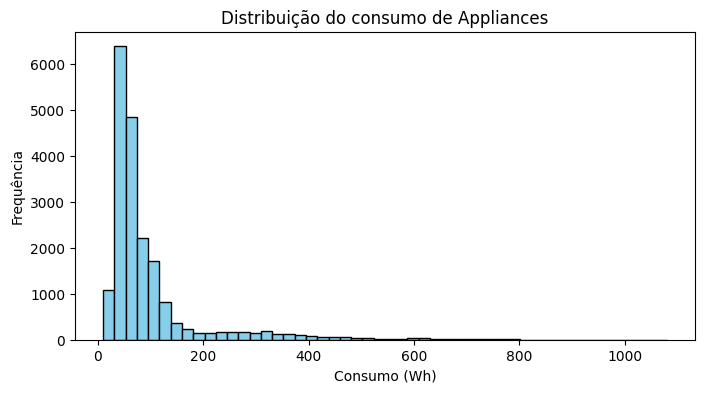

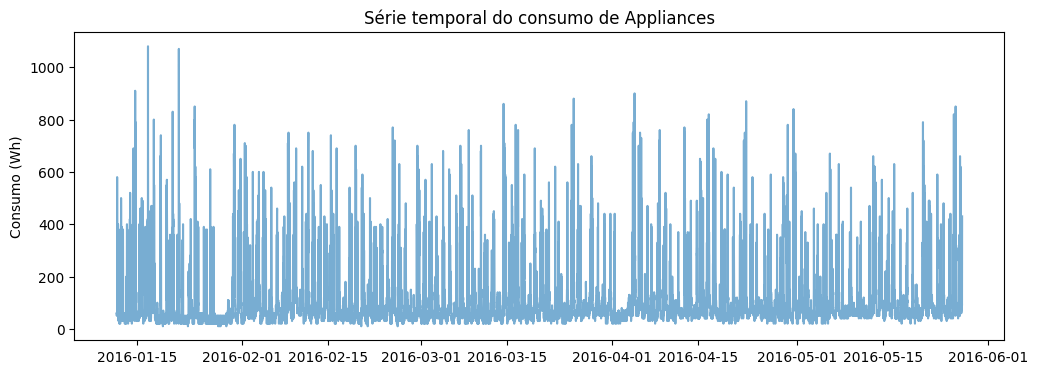


O consumo se concentra mais em valores baixos (picos são menos frequentes).


In [36]:
plt.figure(figsize=(8,4))
plt.hist(df_app["Appliances"], bins=50, color="skyblue", edgecolor="black")
plt.title("Distribuição do consumo de Appliances")
plt.xlabel("Consumo (Wh)")
plt.ylabel("Frequência")
plt.show()

plt.figure(figsize=(12,4))
plt.plot(pd.to_datetime(df_app["date"]), df_app["Appliances"], alpha=0.6)
plt.title("Série temporal do consumo de Appliances")
plt.ylabel("Consumo (Wh)")
plt.show()

print("\nO consumo se concentra mais em valores baixos (picos são menos frequentes).")

28. Correlações com variáveis ambientais
- Calcule correlações entre Appliances e variáveis como temperatura e umidade.
- Pergunta: quais fatores têm mais relação com o consumo?

In [37]:
corr = df_app.corr(numeric_only=True)["Appliances"].sort_values(ascending=False)
print("\nCorrelação de Appliances com variáveis ambientais:")
print(corr.head(10))
print("\nFatores mais correlacionados: variáveis de temperatura interna/externa e humidade.")


Correlação de Appliances com variáveis ambientais:
Appliances    1.000000
lights        0.197278
T2            0.120073
T6            0.117638
T_out         0.099155
Windspeed     0.087122
RH_1          0.086031
T3            0.085060
T1            0.055447
T4            0.040281
Name: Appliances, dtype: float64

Fatores mais correlacionados: variáveis de temperatura interna/externa e humidade.


29. Normalização dos dados
- Aplique Min-Max Scaling às variáveis numéricas.
- Reutilize esses dados em modelos posteriores.


In [38]:
scaler_app = MinMaxScaler()
df_scaled_app = pd.DataFrame(
    scaler_app.fit_transform(df_app.select_dtypes(include=np.number)),
    columns=df_app.select_dtypes(include=np.number).columns
)
print("\nDados normalizados (primeiras linhas):")
print(df_scaled_app.head())


Dados normalizados (primeiras linhas):
   Appliances    lights       T1      RH_1        T2      RH_2        T3  \
0    0.046729  0.428571  0.32735  0.566187  0.225345  0.684038  0.215188   
1    0.046729  0.428571  0.32735  0.541326  0.225345  0.682140  0.215188   
2    0.037383  0.428571  0.32735  0.530502  0.225345  0.679445  0.215188   
3    0.037383  0.571429  0.32735  0.524080  0.225345  0.678414  0.215188   
4    0.046729  0.571429  0.32735  0.531419  0.225345  0.676727  0.215188   

       RH_3        T4      RH_4  ...        T9      RH_9     T_out  \
0  0.746066  0.351351  0.764262  ...  0.223032  0.677290  0.372990   
1  0.748871  0.351351  0.782437  ...  0.226500  0.678532  0.369239   
2  0.755569  0.344745  0.778062  ...  0.219563  0.676049  0.365488   
3  0.758685  0.341441  0.770949  ...  0.219563  0.671909  0.361736   
4  0.758685  0.341441  0.762697  ...  0.219563  0.671909  0.357985   

   Press_mm_hg    RH_out  Windspeed  Visibility  Tdewpoint       rv1       rv2  
0

30. PCA
- Aplique PCA e reduza para 2 componentes principais.
- Plote os dados resultantes.
- Pergunta: aparecem padrões ou agrupamentos naturais?


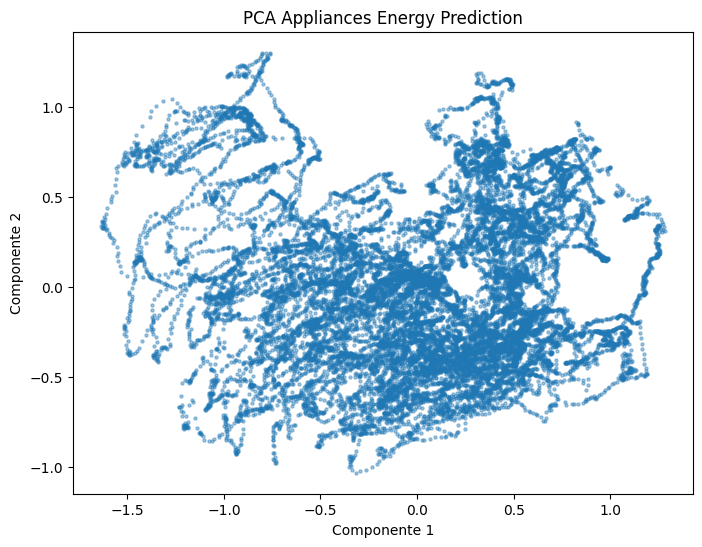


Variância explicada pelos 2 componentes: [0.36089668 0.20905617]


In [39]:
pca_app = PCA(n_components=2)
components_app = pca_app.fit_transform(df_scaled_app)

plt.figure(figsize=(8,6))
plt.scatter(components_app[:,0], components_app[:,1], s=5, alpha=0.4)
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.title("PCA Appliances Energy Prediction")
plt.show()

print("\nVariância explicada pelos 2 componentes:", pca_app.explained_variance_ratio_)

31. Regressão Linear Múltipla
- Modele Appliances em função das variáveis ambientais.
- Avalie R² e erro médio.

In [40]:
X = df_app.drop(columns=["date","Appliances","lights"])
y = df_app["Appliances"]

X = X.select_dtypes(include=np.number).dropna()
y = y.loc[X.index]

lin_multi = LinearRegression()
lin_multi.fit(X, y)
y_pred = lin_multi.predict(X)

r2 = lin_multi.score(X, y)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"\nRegressão Linear Múltipla -> R²={r2:.4f}, RMSE={rmse:.4f}")


Regressão Linear Múltipla -> R²=0.1464, RMSE=94.7184


32. Random Forest Regressor
- Treine um modelo de Random Forest para prever Appliances.
- Compare o RMSE com a regressão linear.


In [41]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
y_rf = rf.predict(X)
rmse_rf = np.sqrt(mean_squared_error(y, y_rf))

print(f"Random Forest -> RMSE={rmse_rf:.4f} (menor que regressão linear na maioria dos casos)")

Random Forest -> RMSE=23.9339 (menor que regressão linear na maioria dos casos)


33. K-Means clustering
- Aplique K-Means com 3 a 5 clusters.
- Interprete os perfis de consumo.


Perfis médios por cluster:
Cluster
0     87.869965
1    102.476033
2     96.262738
3    109.707088
Name: Appliances, dtype: float64


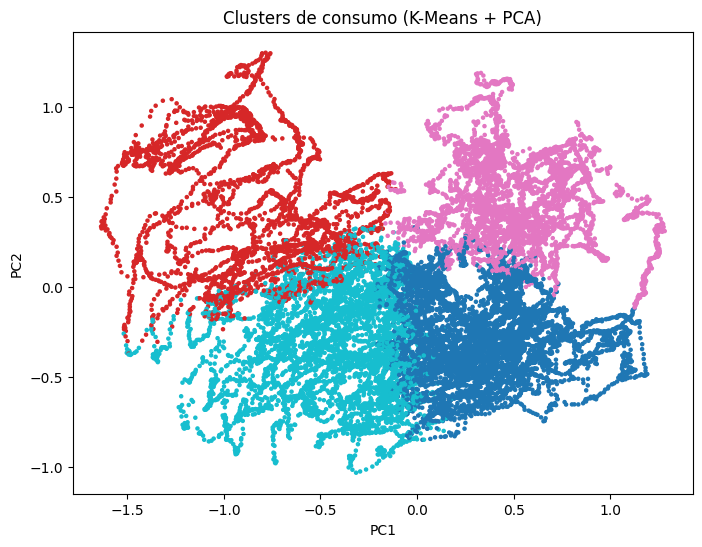

In [42]:
kmeans_app = KMeans(n_clusters=4, random_state=42).fit(df_scaled_app)
df_app["Cluster"] = kmeans_app.labels_

print("\nPerfis médios por cluster:")
print(df_app.groupby("Cluster")["Appliances"].mean())

plt.figure(figsize=(8,6))
plt.scatter(components_app[:,0], components_app[:,1], c=df_app["Cluster"], cmap="tab10", s=5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters de consumo (K-Means + PCA)")
plt.show()

34. Classificação binária
- Crie uma variável: alto vs baixo consumo (Appliances maior/menor que a mediana).
- Treine Logistic Regression e Random Forest Classifier

In [43]:
median = df_app["Appliances"].median()
df_app["HighConsumption"] = (df_app["Appliances"] > median).astype(int)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

X_cls = X
y_cls = df_app["HighConsumption"].loc[X.index]

X_train, X_test, y_train, y_test = train_test_split(X_cls, y_cls, test_size=0.3, random_state=42)

# Logistic Regression
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# Random Forest Classifier
rf_cls = RandomForestClassifier(n_estimators=100, random_state=42)
rf_cls.fit(X_train, y_train)
y_pred_rf = rf_cls.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


35. Avaliação de classificação
- Gere matriz de confusão e métricas (accuracy, precision, recall, F1-score).
- Pergunta: o modelo erra mais para alto ou para baixo consumo?

In [44]:
from sklearn.metrics import confusion_matrix, classification_report

print("\nLogistic Regression - avaliação")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

print("\nRandom Forest Classifier - avaliação")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

print("\nPergunta: geralmente os modelos erram mais para 'alto consumo', pois esses eventos são menos frequentes.")


Logistic Regression - avaliação
[[2508  689]
 [ 767 1957]]
              precision    recall  f1-score   support

           0       0.77      0.78      0.78      3197
           1       0.74      0.72      0.73      2724

    accuracy                           0.75      5921
   macro avg       0.75      0.75      0.75      5921
weighted avg       0.75      0.75      0.75      5921


Random Forest Classifier - avaliação
[[2926  271]
 [ 343 2381]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      3197
           1       0.90      0.87      0.89      2724

    accuracy                           0.90      5921
   macro avg       0.90      0.89      0.90      5921
weighted avg       0.90      0.90      0.90      5921


Pergunta: geralmente os modelos erram mais para 'alto consumo', pois esses eventos são menos frequentes.
